# Portfolio Allocation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import quandl

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [4]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [5]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [7]:
aapl.iloc[0]['Adj. Close']

52.848786580038002

In [9]:
# created a normalized return (cum. daily return)
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [10]:
# 30% apple
# 20% cisco
# 40% amazon
# 10% ibm

In [11]:
for stock_df, allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [13]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [14]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [15]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [16]:
all_pos_vals = [aapl['Position Values'],
                cisco['Position Values'],
                ibm['Position Values'],
                amzn['Position Values']]

portfolio_val = pd.concat(all_pos_vals,axis=1)

In [17]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [18]:
portfolio_val.columns = ['AAPL Pos.','CSCO Pos.','IBM Pos.','AMZN Pos.']

In [19]:
portfolio_val['Total Pos.'] = portfolio_val.sum(axis=1)

In [20]:
portfolio_val.head()

,AAPL Pos.,CSCO Pos.,IBM Pos.,AMZN Pos.,Total Pos.
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


Text(0.5,1,'Total Portfolio Value')

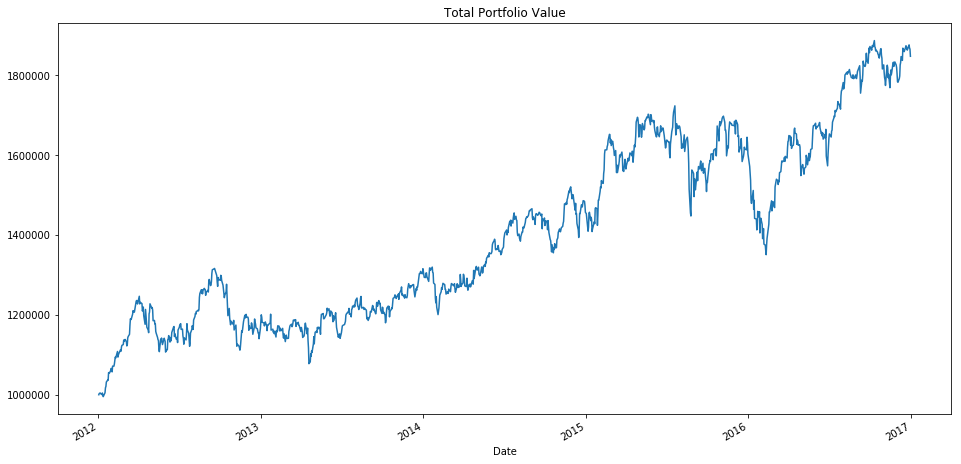

In [21]:
portfolio_val['Total Pos.'].plot(figsize=(16,8))
plt.title('Total Portfolio Value')

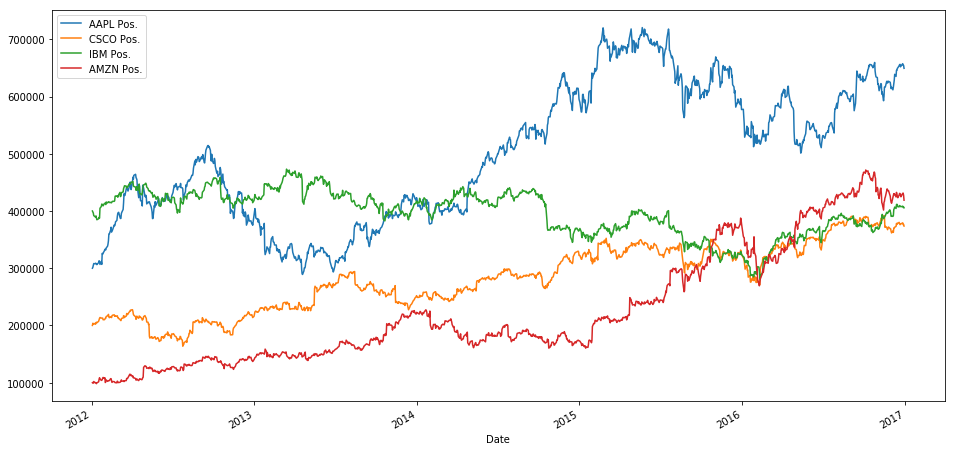

In [23]:
portfolio_val.drop('Total Pos.', axis=1).plot(figsize=(16,8))

## Portfolio Statistics

In [24]:
portfolio_val.head()

,AAPL Pos.,CSCO Pos.,IBM Pos.,AMZN Pos.,Total Pos.
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [25]:
portfolio_val['Daily Ret.'] = portfolio_val['Total Pos.'].pct_change(1)

In [26]:
portfolio_val.head()

,AAPL Pos.,CSCO Pos.,IBM Pos.,AMZN Pos.,Total Pos.,Daily Ret.
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [27]:
portfolio_val['Daily Ret.'].mean()

0.00054423307162152444

In [28]:
portfolio_val['Daily Ret.'].std()

0.010568287769161725

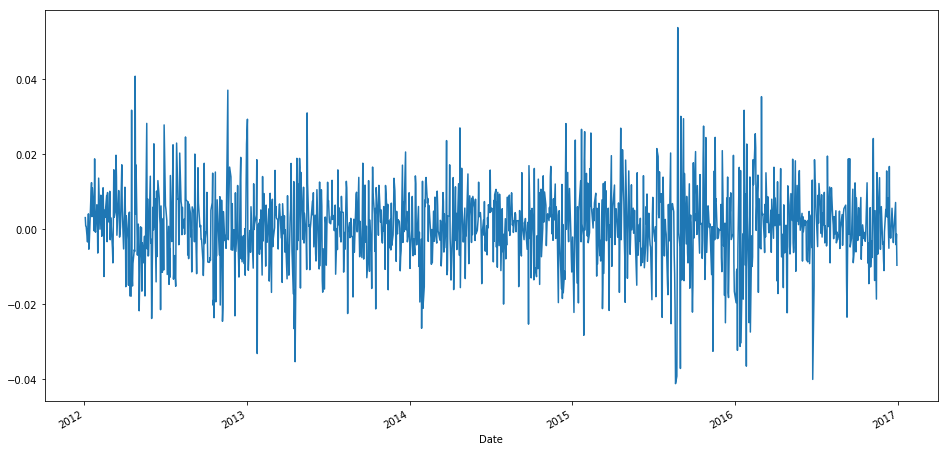

In [29]:
portfolio_val['Daily Ret.'].plot(figsize=(16,8))

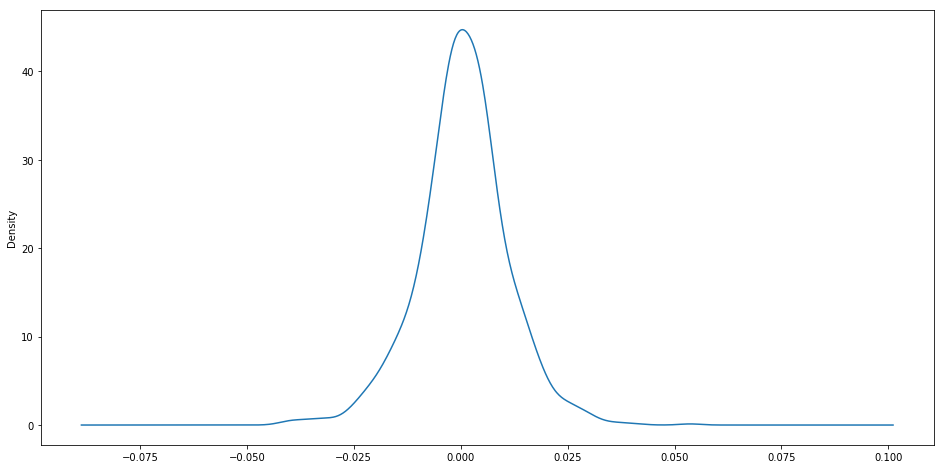

In [30]:
portfolio_val['Daily Ret.'].plot(kind='kde',figsize=(16,8))

In [31]:
cumulative_ret = 100 * (portfolio_val['Total Pos.'][-1]/portfolio_val['Total Pos.'][0]-1)

In [32]:
cumulative_ret

84.742851816655445

In [33]:
# sharpe ratio
sr = portfolio_val['Daily Ret.'].mean()/portfolio_val['Daily Ret.'].std()

In [34]:
sr

0.051496806626480887

In [35]:
asr = (252**0.5) * sr

In [36]:
# annulaized sharpe ratio
asr

0.81748646188590901